# World Data 2023

In [299]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


In [300]:
pd.set_option('display.max_columns', None)

In [301]:
data = pd.read_csv('./../../Datasets/world-data-2023.csv')
countries = data['Country']
data

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175","2,740.27",254.90%,VED,2.27,52.70%,$0.00,"$482,359,318,768",97.20%,79.30%,21.4,Caracas,72.1,125.0,$0.01,Spanish,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",163.52,2.80%,VND,2.05,48.10%,$0.80,"$261,921,244,843",110.60%,28.50%,16.5,Ho Chi Minh City,75.3,43.0,$0.73,Vietnamese,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",157.58,8.10%,YER,3.79,1.00%,$0.92,"$26,914,402,224",93.60%,10.20%,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",212.31,9.20%,ZMW,4.63,65.20%,$1.40,"$23,064,722,446",98.70%,4.10%,40.4,Lusaka,63.5,213.0,$0.24,English,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [302]:
# remove unused/redundant columns columns
to_remove = ['Country', 'Abbreviation', 'Calling Code', 'Capital/Major City', 'Currency-Code', 'Largest city']
data.drop(to_remove, axis=1, inplace=True)

In [303]:
# Validaate duplicates
print("Duplicates: ", data.duplicated().sum())

Duplicates:  0


In [304]:
# Validate missing values
# Drop columns with missing pct > 10%

for col in data.columns:
    missing_values = data[col].isnull().sum()
    pct_missing = round(data[col].isnull().sum()/data[col].value_counts().sum()*100, 2)
    if pct_missing > 10:
        print(col, missing_values, pct_missing)
        data.drop(col, axis=1, inplace=True)


Armed Forces size 24 14.04
Gasoline Price 20 11.43
Minimum wage 45 30.0
Population: Labor force participation (%) 19 10.8
Tax revenue (%) 26 15.38
Unemployment rate 19 10.8


In [305]:
# Clean and encode data
BLANK = ""
encoder = LabelEncoder()

for col in data.columns:
    if data[col].dtypes == 'object':
        # Clean symbols like currency, pct, comma, etc
        data[col] = data[col].apply(lambda x : str(x)\
                                    .replace("%", BLANK)\
                                    .replace("$", BLANK)\
                                    .replace(",", BLANK))
        # encode strings to numeric values
        data[col] = encoder.fit_transform(data[col])
    
    # fill missing values with median
    data[col].fillna(data[col].median(), inplace=True)
        

In [306]:
# Check duplicates - again
data.isnull().sum().sum()

0

In [307]:
# Normalize
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Total tax rate,Urban_population,Latitude,Longitude
0,0.981162,0.700829,1.030362,1.263086,1.418170,0.412874,-0.052726,1.420823,-0.887590,-0.692847,-0.861553,1.455962,1.392868,-1.069241,2.146969,0.784661,1.592265,-0.936604,0.230943,1.377912,1.619993,0.623186,0.715255
1,-1.636269,-0.078952,-0.142119,-0.855918,0.340990,-0.517988,-0.724981,-0.843749,-0.580347,-1.101502,-0.477469,0.313796,-0.691795,0.845629,-0.609083,-1.459408,1.060127,-0.379320,-0.230943,-0.197556,-1.031029,0.925809,-0.001023
2,-0.873910,-1.358593,-0.515181,0.423056,-1.210879,0.485883,-0.171359,0.268672,-1.481592,-0.923826,-0.183758,0.220176,-0.052360,0.599432,-0.179971,-1.367813,-0.408572,-0.064333,0.390827,1.270004,-0.283761,0.375472,-0.279881
3,-0.950146,-0.258902,0.586240,-1.324534,0.414019,1.471503,1.766318,-1.121855,-0.191173,0.124465,-0.567842,1.512134,-0.956927,0.120714,-0.440977,-1.047232,-0.004148,0.910914,1.296835,1.550567,1.104022,0.982563,-0.281958
4,-0.289436,0.240958,-1.314599,2.106186,0.030616,1.215972,-0.250448,2.255139,0.423312,1.652481,0.064767,1.437238,1.585219,-1.575314,0.390704,0.922053,-0.153146,-0.979006,-0.071059,0.795205,-0.870900,-1.270431,-0.035592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.015508,-0.998694,1.527778,-0.231779,-1.192622,1.288980,0.263629,-0.327268,0.689589,0.817402,1.307392,1.081481,0.015223,-0.029740,-0.122461,1.288431,0.591846,0.056816,-0.248708,1.399494,-0.568435,-0.531034,-1.308150
191,-0.009904,-0.338879,0.124354,-0.347398,-0.918763,0.704910,0.105452,-0.502077,0.484761,-0.159818,-0.138572,-0.603682,-0.239512,0.407945,-0.485216,1.975391,0.442848,-0.609502,1.598837,-0.068066,-0.070256,-0.210777,1.326455
192,0.879514,0.041014,0.763889,1.054357,-1.649054,0.613649,1.568595,0.880504,-1.440626,-0.124282,1.104053,-1.577332,1.132935,-0.850399,0.050069,-1.367813,1.677407,-0.918432,-0.177649,-1.190317,-1.600376,-0.148090,0.426079
193,-0.314848,-0.638795,1.225775,1.641662,0.578335,1.124711,1.647684,1.547957,1.058280,-0.408564,1.442951,-0.229201,1.002969,-1.206018,0.266837,-0.726651,-0.493714,-0.385377,-0.852713,-1.708279,1.264151,-1.351441,0.114702


## K-Means

In [308]:
# Divide dimensions to analyze

dimensions = {}
dimensions['education'] = ['Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)'] 
dimensions['population'] = ['Density\n(P/Km2)', 'Population', 'Urban_population'] # 'Official language', 
dimensions['healt'] = ['Fertility Rate', 'Infant mortality', 'Out of pocket health expenditure', \
         'Physicians per thousand', 'Life expectancy', 'Maternal mortality ratio', 'Birth Rate']
dimensions['economics'] = ['GDP', 'Total tax rate'] # 'CPI', 'CPI Change (%)', 
dimensions['geo_enviroment'] = ['Latitude', 'Longitude', 'Agricultural Land( %)', 'Forested Area (%)', \
                                'Land Area(Km2)', 'Co2-Emissions']
# dimensions['all'] = list(data.columns)

dimensions = dict(sorted(dimensions.items()))

# Basic compute k-means
def compute_kmeans(data_, k_):
    model = KMeans(n_clusters=k_, n_init='auto', random_state=42)
    model.fit(data_)
    return model

# Calculate best n-cluster with silhouete
def calculate_silhouete(data_, dimension_name_):
    # Calcular limite de cluster pela raiz do número de amostras
    limit = int((data_.shape[0]//2)**0.5)

    for k in range(2, limit+1):
        model = compute_kmeans(data_, k)
        pred = model.predict(data_)
        score = silhouette_score(data_, pred)

        print('{}: Silhouette Score for k = {}: {:<.3f}'.format(dimension_name_, k, score))


# Calculate best n-cluster with ellbow method
def calculate_elbow(data_, dimension_name_):
    # Calcular limite de cluster pela raiz do número de amostras
    limit = int((data_.shape[0]//2)**0.5)
    
    # clean
    data_scaled_elbow = data_.drop(['Cluster', 'Country'], axis=1)
    wcss = {}

    for k in range(2, limit+1):
        model = compute_kmeans(data_scaled_elbow, k)
        wcss[k] = model.inertia_

    # # plottando os valores de wcss para encontrar o valor de elbow
    # plt.plot(wcss.keys(), wcss.values(), 'gs-')
    # plt.xticks(np.arange(min(wcss.keys()), max(wcss.keys())+1, 1.0))
    # plt.xlabel('Values of "k"')
    # plt.ylabel('WCSS')
    # plt.show()

    model =  KMeans(random_state=15, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,limit), locate_elbow=False)

    visualizer.fit(data_scaled_elbow)
    visualizer.set_title(f"Distorcio Score Elbow for KMeans Clustering - {dimension_name_}")
    visualizer.show()

def run_model(data_, k_, countries_, dimensions_):
    for key in dimensions_.keys():
        data = data_[dimensions_[key]].copy()
        model = compute_kmeans(data, k_)

        data['Cluster'] = model.labels_
        data['Country'] = countries_

        for c in data['Cluster'].unique():
            print("=="*20)
            print(f"Dimension: {key}")
            print('Cluster #: ', c)
            print("=="*20)
            print(data.loc[data['Cluster'] == c]['Country'])
        
        calculate_silhouete(data.drop('Country', axis=1), key)
        calculate_elbow(data, key)

        # sns.pairplot(data, hue='Cluster', palette='viridis')
        # plt.show()
        

Dimension: economics
Cluster #:  1
0                   Afghanistan
2                       Algeria
5           Antigua and Barbuda
8                     Australia
18                        Benin
23                       Brazil
24                       Brunei
26                 Burkina Faso
33     Central African Republic
34                         Chad
36                        China
39        Republic of the Congo
42                         Cuba
53            Equatorial Guinea
54                      Eritrea
61                        Gabon
62                   The Gambia
63                      Georgia
66                       Greece
67                      Grenada
69                       Guinea
70                Guinea-Bissau
77                        India
83                        Italy
101                  Madagascar
105                        Mali
106                       Malta
107            Marshall Islands
110                      Mexico
112                     Moldova
116  

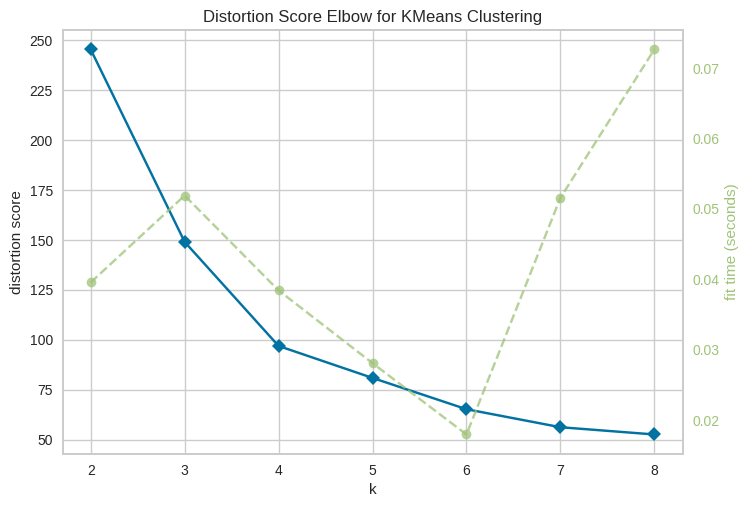

Dimension: education
Cluster #:  1
0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
6                             Argentina
9                               Austria
15                              Belarus
16                              Belgium
32                               Canada
35                                Chile
36                                China
44                       Czech Republic
45     Democratic Republic of the Congo
46                              Denmark
48                             Dominica
49                   Dominican Republic
57                             Ethiopia
59                              Finland
60                               France
64                              Germany
75                              Hungary
76                              Iceland
79                                 Iran
81   

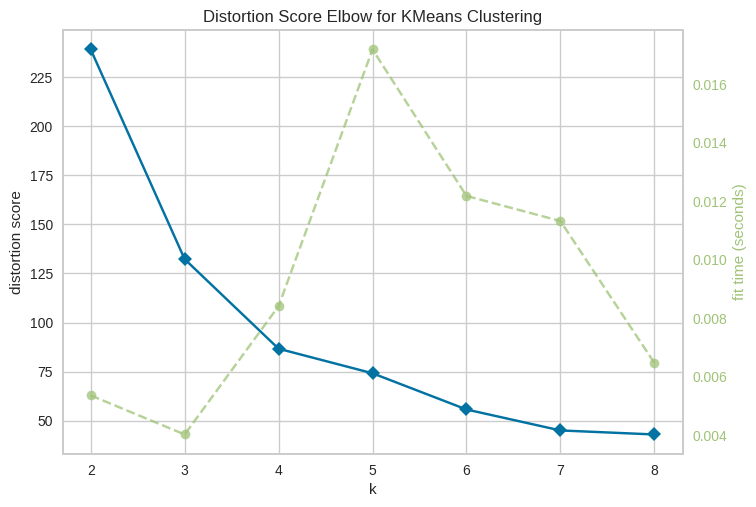

Dimension: geo_enviroment
Cluster #:  4
0                 Afghanistan
1                     Albania
3                     Andorra
5         Antigua and Barbuda
9                     Austria
10                 Azerbaijan
12                    Bahrain
21     Bosnia and Herzegovina
29                 Cape Verde
32                     Canada
36                      China
41                    Croatia
43                     Cyprus
44             Czech Republic
46                    Denmark
55                    Estonia
60                     France
63                    Georgia
75                    Hungary
80                       Iraq
81        Republic of Ireland
83                      Italy
86                     Jordan
93                     Latvia
99                  Lithuania
122               Netherlands
129                    Norway
131                  Pakistan
139                    Poland
140                  Portugal
149                San Marino
153                    Serbia


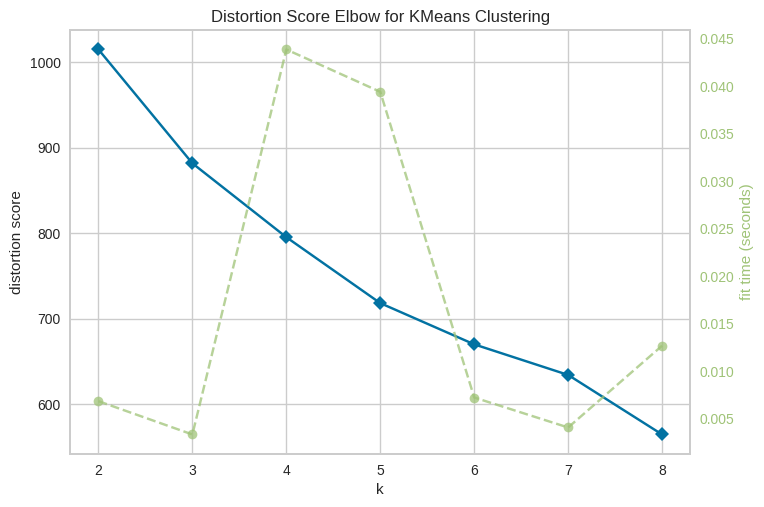

Dimension: healt
Cluster #:  3
0                           Afghanistan
18                                Benin
28                          Ivory Coast
31                             Cameroon
33             Central African Republic
34                                 Chad
45     Democratic Republic of the Congo
53                    Equatorial Guinea
69                               Guinea
70                        Guinea-Bissau
105                                Mali
108                          Mauritania
117                          Mozambique
125                               Niger
126                             Nigeria
155                        Sierra Leone
160                             Somalia
163                         South Sudan
Name: Country, dtype: object
Dimension: healt
Cluster #:  2
1                             Albania
10                         Azerbaijan
13                         Bangladesh
22                           Botswana
24                             Brunei

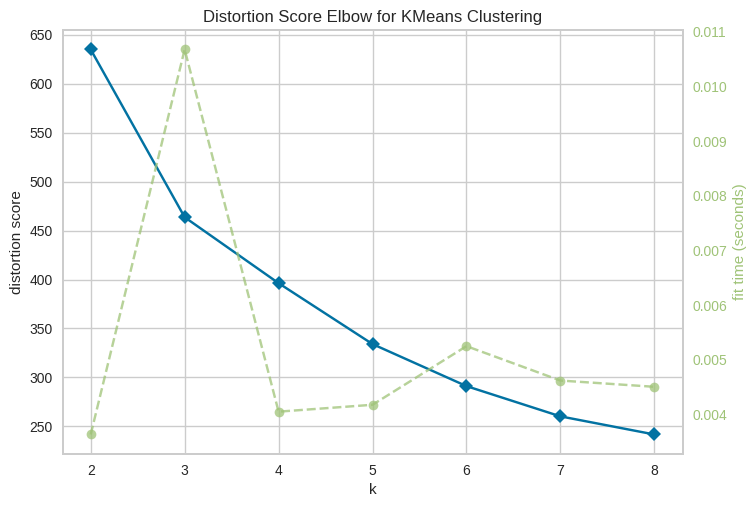

Dimension: population
Cluster #:  3
0                         Afghanistan
14                           Barbados
26                       Burkina Faso
30                           Cambodia
53                  Equatorial Guinea
56                           Eswatini
66                             Greece
67                            Grenada
69                             Guinea
70                      Guinea-Bissau
72                              Haiti
77                              India
95                            Lesotho
109                         Mauritius
111    Federated States of Micronesia
120                             Nauru
128                   North Macedonia
138                       Philippines
148                             Samoa
152                           Senegal
165                         Sri Lanka
170                             Syria
178                           Tunisia
181                            Tuvalu
194                          Zimbabwe
Name: Country,

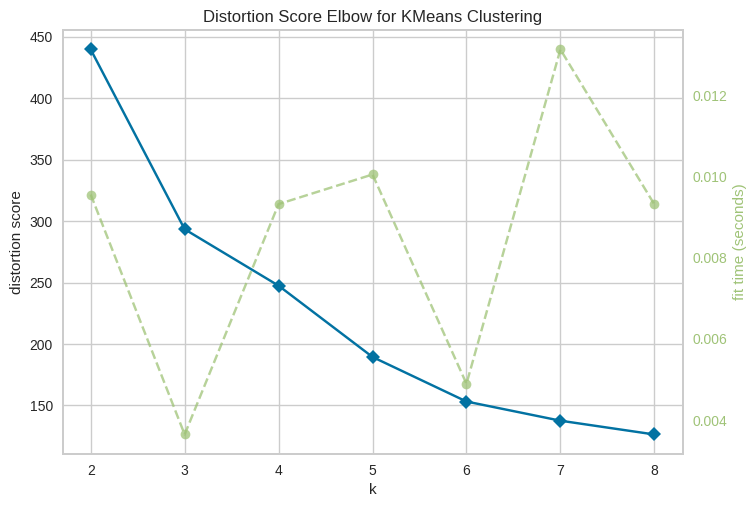

In [309]:
run_model(data_scaled, 5, countries, dimensions)